In [1]:
import pandas as pd
import os 

file_name = r'C:\Users\Windows\Documents\online retail pro1\online_retail.csv' 
#df= data frame
df = None 

print(f"تلاش برای بارگذاری فایل: {file_name}")

try:
    # 1. تلاش با کدگذاری استاندارد UTF-8
    df = pd.read_csv(file_name, encoding='utf-8')
    print("✅ فایل با موفقیت با کدگذاری UTF-8 بارگذاری شد.")

except FileNotFoundError:
    print(f"❌ خطا: فایل '{file_name}' پیدا نشد. لطفا مطمئن شوید که فایل در مسیر صحیح قرار دارد.")
    
except UnicodeDecodeError:
    print("⚠️ کدگذاری UTF-8 شکست خورد. تلاش با Latin-1...")
    try:
       
        df = pd.read_csv(file_name, encoding='latin1')
        print("✅ فایل با موفقیت با کدگذاری Latin-1 بارگذاری شد.")
    except Exception as e:
        print(f"❌ خطای نهایی در بارگذاری: {e}")

تلاش برای بارگذاری فایل: C:\Users\Windows\Documents\online retail pro1\online_retail.csv
✅ فایل با موفقیت با کدگذاری UTF-8 بارگذاری شد.


In [20]:
if df is not None:
    print("\n--- تایید موفقیت بارگذاری ---")
    
    # مشاهده 5 سطر اول
    print("نمایش 5 سطر اول داده:")
    print(df.head())
    
    # مشاهده اطلاعات ساختاری: تعداد سطر، ستون، داده های غیرناقص و نوع داده
    print("\nاطلاعات ستون‌ها :")
    df.info()
else:
    print("\n--- بارگذاری ناموفق ---")
    print("لطفاً مرحله ۱.۲ را مجدداً بررسی کنید.")


--- تایید موفقیت بارگذاری ---
نمایش 5 سطر اول داده:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

اطلاعات ستون‌ها :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Coun

In [3]:
# الف) حذف ردیف‌های بدون CustomerID
# این ردیف‌ها برای تحلیل رفتار مشتری استفاده نمی‌شوند.
df_cleaned = df.dropna(subset=['CustomerID'])

# ب) حذف ردیف‌های بدون Description
# ردیف‌های بدون توضیحات کالا نیز مفید نیستند.
df_cleaned = df_cleaned.dropna(subset=['Description'])

# بررسی تعداد ردیف‌های باقی‌مانده:
print(f"تعداد ردیف‌ها قبل از تمیزکاری: {len(df)}")
print(f"تعداد ردیف‌ها بعد از حذف داده‌های گمشده: {len(df_cleaned)}")

تعداد ردیف‌ها قبل از تمیزکاری: 541909
تعداد ردیف‌ها بعد از حذف داده‌های گمشده: 406829


In [4]:
# ۱. تبدیل InvoiceDate به فرمت تاریخ و زمان (DateTime)
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# ۲. تبدیل CustomerID به عدد صحیح (Integer) و سپس رشته/آبجکت
# ابتدا به int تبدیل می‌کنیم (چون قبلاً float بود و اعشار داشتیم).
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int).astype(str)

# ۳. بررسی دوباره انواع داده
print("\nانواع داده پس از تبدیل:")
print(df_cleaned.dtypes)


انواع داده پس از تبدیل:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [5]:
# الف) حذف تراکنش‌هایی که Quantity یا UnitPrice در آنها نامعتبر است (صفر یا منفی)
# ما فقط تراکنش‌های مثبت را نگه می‌داریم:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

# بررسی تعداد نهایی ردیف‌ها
print(f"\nتعداد نهایی ردیف‌های تمیزشده پس از حذف مقادیر نامعتبر: {len(df_cleaned)}")


تعداد نهایی ردیف‌های تمیزشده پس از حذف مقادیر نامعتبر: 397884


In [6]:
# ایجاد ستون جدید TotalSales با ضرب Quantity در UnitPrice
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

print("5 سطر اول پس از محاسبه TotalSales:")
print(df_cleaned[['Quantity', 'UnitPrice', 'TotalSales']].head())

5 سطر اول پس از محاسبه TotalSales:
   Quantity  UnitPrice  TotalSales
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


In [7]:
# از ستون InvoiceDate که قبلاً به DateTime تبدیل کردیم، استفاده می‌کنیم.
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M') # برای تحلیل ماهانه
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.day_name() # روز هفته به صورت نام (مثلاً Monday)

print("\nستون‌های تاریخ جدید:")
print(df_cleaned[['InvoiceDate', 'YearMonth', 'DayOfWeek']].head())



ستون‌های تاریخ جدید:
          InvoiceDate YearMonth  DayOfWeek
0 2010-12-01 08:26:00   2010-12  Wednesday
1 2010-12-01 08:26:00   2010-12  Wednesday
2 2010-12-01 08:26:00   2010-12  Wednesday
3 2010-12-01 08:26:00   2010-12  Wednesday
4 2010-12-01 08:26:00   2010-12  Wednesday


In [8]:
# محاسبه مجموع فروش بر اساس YearMonth
monthly_sales = df_cleaned.groupby('YearMonth')['TotalSales'].sum()

print("فروش ماهانه:")
print(monthly_sales)

# 💡 نکته: برای رسم نمودار (Visualization) باید دستورات خاصی استفاده شود،
# اما در اینجا فقط خروجی عددی را می‌بینیم.
# مثال کد نمودار: monthly_sales.plot(kind='line', title='Total Sales by Month')

فروش ماهانه:
YearMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: TotalSales, dtype: float64


In [9]:
# محاسبه مجموع فروش بر اساس روز هفته
# برای داشتن ترتیب صحیح روزهای هفته در نمودار، باید آنها را مرتب کنیم.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
day_sales = df_cleaned.groupby('DayOfWeek')['TotalSales'].sum().reindex(day_order)

print("\nفروش بر اساس روز هفته:")
print(day_sales)
# 💡 نکته: روز شنبه (Saturday) در این مجموعه داده وجود ندارد.


فروش بر اساس روز هفته:
DayOfWeek
Monday       1367146.411
Tuesday      1700634.631
Wednesday    1588336.170
Thursday     1976859.070
Friday       1485917.401
Sunday        792514.221
Name: TotalSales, dtype: float64


In [10]:
# گروه‌بندی بر اساس Description (توضیحات کالا) و محاسبه مجموع TotalSales
top_products = df_cleaned.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

print("\n۱۰ محصول برتر بر اساس درآمد:")
print(top_products)


۱۰ محصول برتر بر اساس درآمد:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalSales, dtype: float64


In [11]:
# الف) ۱۰ مشتری برتر (Top 10 Customers)
top_customers = df_cleaned.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10)

print("\n۱۰ مشتری برتر (بر اساس مجموع خرید):")
print(top_customers)

# ب) ۵ کشور برتر (Top 5 Countries)
top_countries = df_cleaned.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

print("\n۵ کشور برتر (بر اساس درآمد):")
print(top_countries)


۱۰ مشتری برتر (بر اساس مجموع خرید):
CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: TotalSales, dtype: float64

۵ کشور برتر (بر اساس درآمد):
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalSales, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات برای نمایش بهتر نمودارها در نوت‌بوک
%matplotlib inline 
# تنظیم استایل نمودارها
sns.set_style("whitegrid")

In [13]:
monthly_sales = df_cleaned.groupby('YearMonth')['TotalSales'].sum()

C:\Users\Windows\AppData\Local\Temp\ipykernel_11364\242314025.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout() # تنظیم فضاها
C:\Users\Windows\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Windows\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


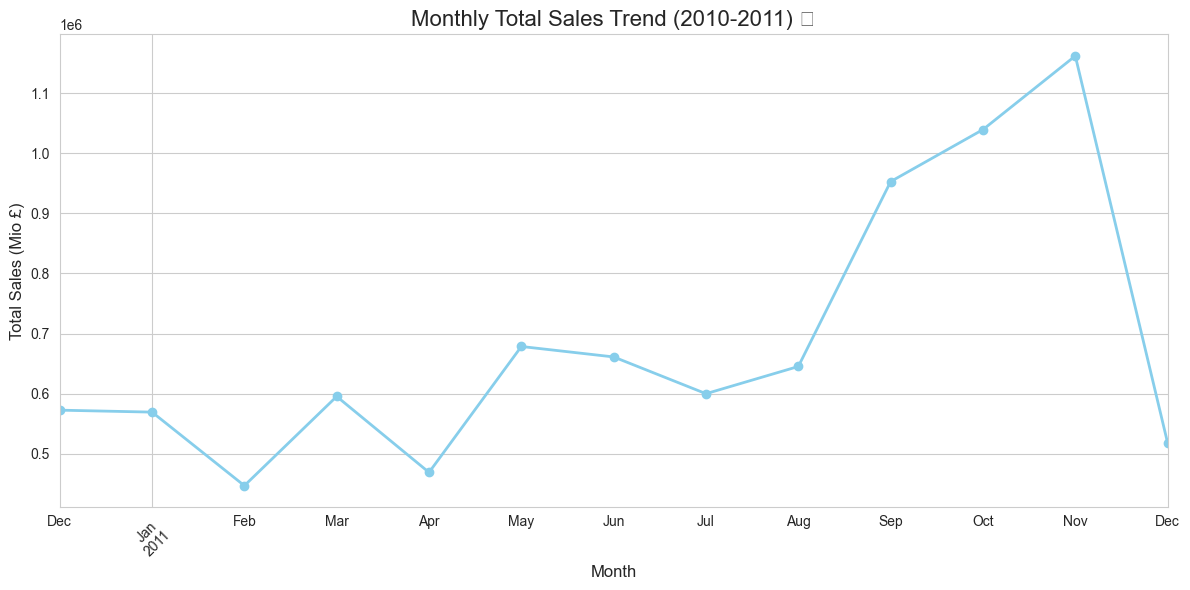

In [14]:
plt.figure(figsize=(12, 6))

# رسم نمودار خطی
monthly_sales.plot(kind='line', marker='o', color='skyblue', linewidth=2) 

# اضافه کردن عنوان و برچسب‌ها
plt.title('Monthly Total Sales Trend (2010-2011) 📈', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (Mio £)', fontsize=12)

# چرخش برچسب‌های محور X برای خوانایی بهتر
plt.xticks(rotation=45)

# نمایش خطوط شبکه‌ای
plt.grid(True)
plt.tight_layout() # تنظیم فضاها
plt.show()

In [15]:
top_products = df_cleaned.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

C:\Users\Windows\AppData\Local\Temp\ipykernel_11364\1203944891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
C:\Users\Windows\AppData\Local\Temp\ipykernel_11364\1203944891.py:14: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()
C:\Users\Windows\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


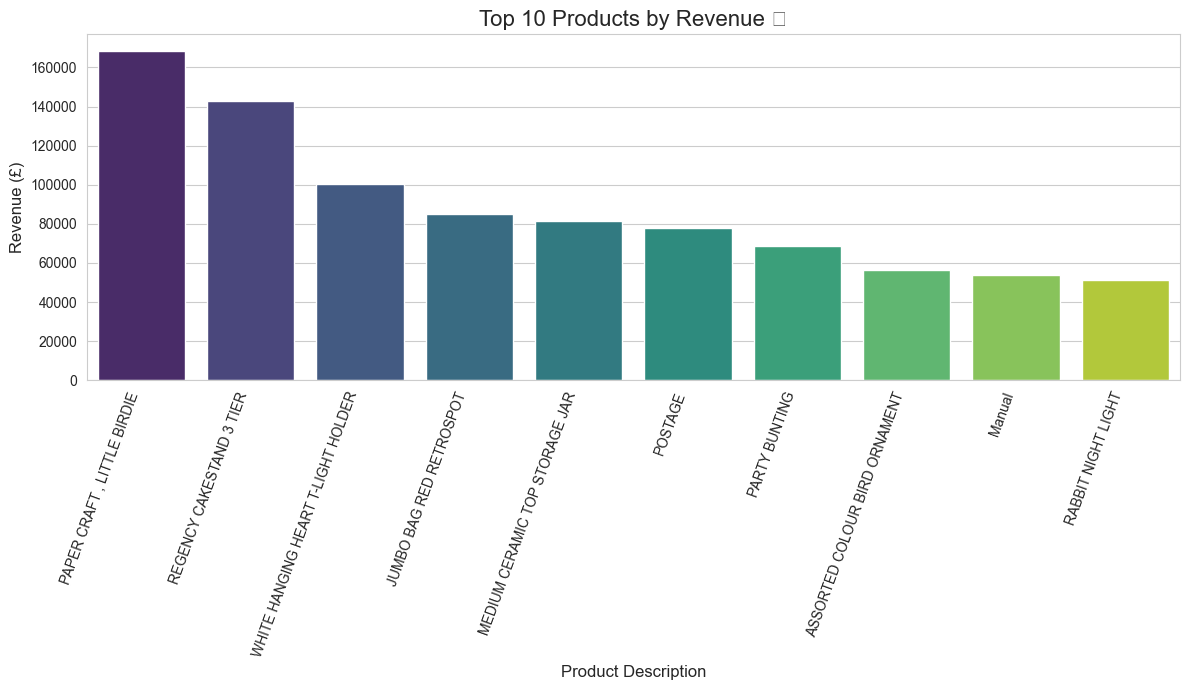

In [16]:
plt.figure(figsize=(12, 7))

# رسم نمودار میله‌ای با Seaborn
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")

# اضافه کردن عنوان و برچسب‌ها
plt.title('Top 10 Products by Revenue 💰', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)

# چرخش برچسب‌های محور X برای خوانایی بهتر
plt.xticks(rotation=70, ha='right')

plt.tight_layout()
plt.show()

In [17]:
# ترتیب صحیح روزهای هفته
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'] 
day_sales = df_cleaned.groupby('DayOfWeek')['TotalSales'].sum().reindex(day_order)

C:\Users\Windows\AppData\Local\Temp\ipykernel_11364\3252118007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_sales.index, y=day_sales.values, palette="rocket")
C:\Users\Windows\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Windows\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


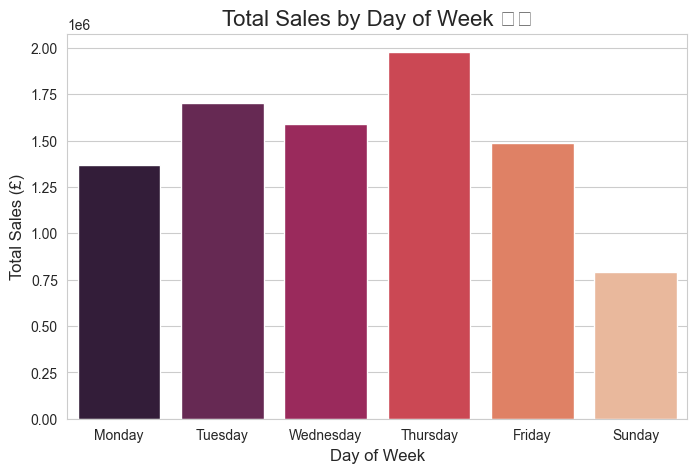

In [18]:
plt.figure(figsize=(8, 5))

# رسم نمودار میله‌ای
sns.barplot(x=day_sales.index, y=day_sales.values, palette="rocket")

# اضافه کردن عنوان و برچسب‌ها
plt.title('Total Sales by Day of Week 🗓️', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)

plt.show()